# <font color = black>Importing all the required modules</font>

In [197]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,20)

# <font color = black>Importing the Property dataset</font>

In [198]:
df =pd.read_csv("property_data.csv")

In [199]:
df.head()

,area,bathroom_num,bedroom_num,city,desc,dev_name,floor_count,floor_num,furnishing,id,id_string,latitude,locality,longitude,post_date,poster_name,price,project,title,trans,type,url,user_type
0,350.0,2.0,1,Mumbai,"2 Bath,Unfurnished,East facing The project has...",NaN,NaN,NaN,Unfurnished,45349857,domcache_srp_45349857,19.201336,Malad West,72.825882,2020-01-11,Saurabh Patil,9000,NaN,1 BHK Apartment for Rent in Malad West,Rent,Apartment,/propertyDetails/1-BHK-350-Sq-ft-Multistorey-A...,Agent
1,652.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing A 1BHK apart...",Veena Group,NaN,NaN,Semi-Furnished,45960973,domcache_srp_45960973,19.410704,Vasai,72.833592,2020-01-11,Gorakh Chavan,8060,Veena Dynasty,"1 BHK Apartment for Rent in Veena Dynasty, Vasai",Rent,Apartment,/propertyDetails/1-BHK-652-Sq-ft-Multistorey-A...,Agent
2,635.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,4 floor,West facing A be...",Agarwal Group,7.0,4.0,Semi-Furnished,46688849,domcache_srp_46688849,19.467032,Virar,72.801612,2019-12-13,Lokesh Joshi,8000,Agarwal Lifestyle,"1 BHK Apartment for Rent in Agarwal Lifestyle,...",Rent,Apartment,/propertyDetails/1-BHK-635-Sq-ft-Multistorey-A...,Agent
3,540.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing Essential Se...",NaN,NaN,NaN,Semi-Furnished,44696119,domcache_srp_44696119,19.407257,Vasai East,72.836006,2020-01-13,Sajith Thomas,8000,NaN,1 BHK Apartment for Rent in Vasai East,Rent,Apartment,/propertyDetails/1-BHK-540-Sq-ft-Multistorey-A...,Agent
4,625.0,1.0,1,Mumbai,"1 Bath,Furnished,2 floor,North facing 24 hours...",Millennium Group,7.0,2.0,Furnished,46742851,domcache_srp_46742851,19.360215,Naigaon East,72.850167,2019-12-17,Charmaine Gomez,9000,Mittal Enclave,"1 BHK Apartment for Rent in Mittal Enclave, Na...",Rent,Apartment,/propertyDetails/1-BHK-625-Sq-ft-Multistorey-A...,Owner


## <font color = black>Deleting the unnecessary columns and creating a new data set with only the important columns.</font>

In [200]:
df_final = df[["area","bathroom_num","bedroom_num","locality","price"]]
df_final.head()

,area,bathroom_num,bedroom_num,locality,price
0,350.0,2.0,1,Malad West,9000
1,652.0,2.0,1,Vasai,8060
2,635.0,2.0,1,Virar,8000
3,540.0,2.0,1,Vasai East,8000
4,625.0,1.0,1,Naigaon East,9000


In [201]:
df_final.shape

(34348, 5)

# <font color = black>Checking for the null values if any.</font>

In [202]:
df_final.isnull().sum()

area            776
bathroom_num     14
bedroom_num       0
locality        208
price             0
dtype: int64

# <font color = black>Dropping all the Null values. Since our dataset has got 32000 rows, deleting the 208  null values wont have any impact.</font>

In [203]:
df_final1 = df_final.dropna()
df_final1.isna().sum()

area            0
bathroom_num    0
bedroom_num     0
locality        0
price           0
dtype: int64

In [204]:
df_final1.shape

(33355, 5)

In [205]:
df_final1["bedroom_num"].unique()

array([1, 3, 4, 5, 2])

In [206]:
df_final1["bathroom_num"].unique()

array([2., 1., 3., 4., 5., 6., 7., 8.])

In [207]:
df_final1["locality"].unique()

array(['Malad West', 'Vasai', 'Virar', 'Vasai East', 'Naigaon East',
       'Virar West', 'Royal Palms Estate', 'Nalasopara', 'Silver Park',
       'Vasai West', 'Andheri East', 'Mulund East', 'Nalasopara East',
       'Balkum Pada - Majiwada', 'Kalyan', 'Bhayandar East',
       'Mira Bhayandar', 'MHADA Colony', 'Chembur Camp', 'Govind Nagar',
       'Bhayandar West', 'Beverly Park', 'Worli', 'Nalasopara West',
       'Lok Manya Nagar', 'Borivali West', 'Malvani', 'Viva College Road',
       'Mira Road', 'New Link Road', 'Sakinaka', 'Dongri', 'MMRDA Area',
       'Yashavant Nagar', 'Kandivali East', 'Ghatkopar West',
       'Ghodbunder', 'Nahur West', 'CAMA Industrial Estate',
       'Anushakti Colony', 'Thane', 'Yari Road', 'Virar East',
       'Goregaon East', 'Prabhadevi', 'Andheri West', 'Pandurang Wadi',
       'Bandra West', 'Khar West', 'Bolinj', 'Virat Nagar',
       'Thane-Kalyan-Dombivli', 'Poonam Gardens', 'Ramdev Park',
       'Vinay Nagar', 'Unique Garden', 'Tirupati Nagar

In [208]:
df_final_copy = df_final1.copy()

# <font color = black>Deleting terms like "West" and "East" from the address of the property. The below function is written for the same.</font>

In [209]:
def local(x):
    name = ""
    if "west" in x.lower() or "east" in x.lower():
        a = x.split()
        b = a.pop()
        for s in a:
            name = name+s
        return name
    else:
        return x

# <font color = black>Cheking if the function works properly before applying it on the dataset.</font>

In [210]:
print(local("Borivali East"))

Borivali


# <font color = black>Applying the function on our dataset</font>

In [211]:
df_final_copy["locality"] = df["locality"].apply(lambda x:local(str(x)))
df_final_copy["locality"].unique()

array(['Malad', 'Vasai', 'Virar', 'Naigaon', 'Royal Palms Estate',
       'Nalasopara', 'Silver Park', 'Andheri', 'Mulund',
       'Balkum Pada - Majiwada', 'Kalyan', 'Bhayandar', 'Mira Bhayandar',
       'MHADA Colony', 'Chembur Camp', 'Govind Nagar', 'Beverly Park',
       'Worli', 'Lok Manya Nagar', 'Borivali', 'Malvani',
       'Viva College Road', 'Mira Road', 'New Link Road', 'Sakinaka',
       'Dongri', 'MMRDA Area', 'Yashavant Nagar', 'Kandivali',
       'Ghatkopar', 'Ghodbunder', 'Nahur', 'CAMA Industrial Estate',
       'Anushakti Colony', 'Thane', 'Yari Road', 'Goregaon', 'Prabhadevi',
       'Pandurang Wadi', 'Bandra', 'Khar', 'Bolinj', 'Virat Nagar',
       'Thane-Kalyan-Dombivli', 'Poonam Gardens', 'Ramdev Park',
       'Vinay Nagar', 'Unique Garden', 'Tirupati Nagar',
       'Charkop Sector 8', 'Bandra Kurla Complex', 'Aarey Milk Colony',
       'Bhandup Industrial Estate', 'Oberoi Splendor', 'Charkop Village',
       'Devi Pada', 'Datta Pada', 'Jankalyan Nagar', 'Magath

In [212]:
df_final_copy["area"].unique()

array([350., 652., 635., ..., 150., 663., 642.])

## Feature Reduction

In [214]:
df_final_copy["locality"] = df_final_copy["locality"].apply(lambda x: x.strip())
location_stats = df_final_copy["locality"].value_counts().sort_values(ascending = False)
print(location_stats)

Andheri                     2458
Powai                       1453
Chembur                     1400
Goregaon                    1110
Bandra                      1085
                            ... 
MHADA Colony Milat Nagar       1
Gamdia Colony Chowk            1
Jeejamata Road                 1
Munjar Nagar                   1
Paranjape Nagar                1
Name: locality, Length: 768, dtype: int64


In [215]:
len(location_stats[location_stats<=10])

529

In [216]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Azad Nagar Versova Road     10
Nana Chowk                  10
Upper Worli                 10
Uppar Colaba                10
Acharya A Maharaj Chowk     10
                            ..
MHADA Colony Milat Nagar     1
Gamdia Colony Chowk          1
Jeejamata Road               1
Munjar Nagar                 1
Paranjape Nagar              1
Name: locality, Length: 529, dtype: int64

In [217]:
df_final_copy["locality"] = df_final_copy["locality"].apply(lambda x: "Others" if x in location_stats_less_than_10 else x)
df_final_copy["locality"].value_counts()

Andheri           2458
Others            1606
Powai             1453
Chembur           1400
Goregaon          1110
                  ... 
Premier Colony      11
Alika Nagar         11
Gopal Nagar         11
Gandhi Nagar        11
Antop Hill          11
Name: locality, Length: 240, dtype: int64

In [218]:
df_final_copy["locality"].value_counts()

Andheri           2458
Others            1606
Powai             1453
Chembur           1400
Goregaon          1110
                  ... 
Premier Colony      11
Alika Nagar         11
Gopal Nagar         11
Gandhi Nagar        11
Antop Hill          11
Name: locality, Length: 240, dtype: int64

## OUTLIER DETECTION

In [219]:
df_final_copy.shape

(33355, 5)

In [220]:
df_final_copy.columns

Index(['area', 'bathroom_num', 'bedroom_num', 'locality', 'price'], dtype='object')

In [221]:
df_without_out = df_final_copy[~(df_final_copy["area"]/df_final_copy["bedroom_num"]<300)]
df_without_out.shape

(33015, 5)

Text(0, 0.5, 'Count')

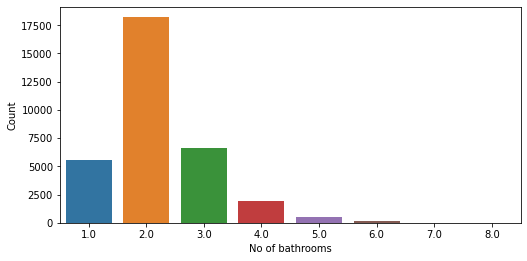

In [222]:
bathrooms = df_without_out["bathroom_num"].value_counts()
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,0.8,1])
bathroom_count = bathrooms.index
freq = bathrooms
sns.barplot(x = bathroom_count,y = freq)
plt.xlabel("No of bathrooms")
plt.ylabel("Count")

In [223]:
df_without_bath = df_without_out[~(df_without_out["bathroom_num"]>df_without_out["bedroom_num"]+2)]
df_without_bath.shape

(33005, 5)

Text(0, 0.5, 'Count')

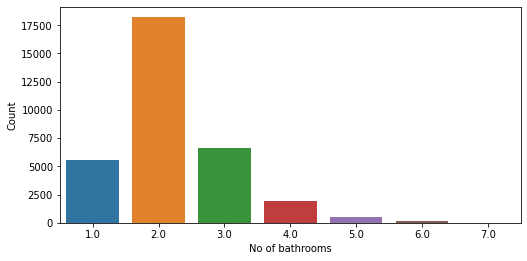

In [224]:
bathrooms = df_without_bath["bathroom_num"].value_counts()
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,0.8,1])
bathroom_count = bathrooms.index
freq = bathrooms
sns.barplot(x = bathroom_count,y = freq)
plt.xlabel("No of bathrooms")
plt.ylabel("Count")

In [225]:
df_without_bath.to_csv("Properties_cleaned.csv",index=False)